## A small chaotic spiking network

In [2]:
using PyPlot, StaticArrays

In [9]:
# poincare section of chaotic network of three neurons
function spikingnet()
    
    # number of spikes in calculation
    nspikes = 10^7                           
    
    # define adjacency matrix
    topo = SMatrix{3,3}(0.<[0 0 0; 
                            1 0 1; 
                            0 1 0])
    
    # define effective coupling strength
    c = 1.0
    
    #initial network state
    ϕ = rand(3)   
    
    
    # initialize phase history
    𝚽 = Float64[]
    
    tic()
    for s = 1:nspikes
        
        # find next spiking neuron j
        ϕmax, j = findmax(ϕ)
        
        # calculate next spike time
        dt = π/2 - ϕmax
        
        # evolve phases till next spike time
        ϕ += dt
        
        # get postsynaptic neurons
        post = topo[:,j]               
        
        # update postsynaptic neurons (quadratic integrate and fire neuron)
        ϕ[post] = atan.(tan.(ϕ[post]) - c)  
        
        # reset spiking neuron
        ϕ[j] = -π/2         
        
        # save neuron 2 & 3 whenever neuron 1 spikes
        j==1 && append!(𝚽,ϕ[2:3]) 
        
    end
    toc()
    
    plot(𝚽[1:2:end], 𝚽[2:2:end],",k",ms=.01,alpha=0.01);axis("off")
    nothing
end

spikingnet (generic function with 1 method)

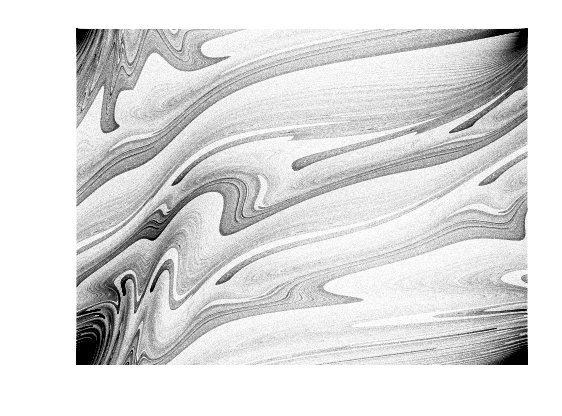

elapsed time: 4.799854874 seconds


In [10]:
# run network simulation of three spiking neurons and plot Poincare section
spikingnet()

### minimal spiking network

In [11]:
function fun()
n,ϕ,𝚽=SMatrix{3,3}(0.<[0 0 0;1 0 1;0 1 0]),randn(3),[]
for s=1:10^7
    m,j=findmax(ϕ)
    ϕ+=π/2-m
    ϕ[n[:,j]],ϕ[j]=atan.(tan.(ϕ[n[:,j]])-1.),-π/2
    j==1 && append!(𝚽,ϕ[2:3])
end
plot(𝚽[1:2:end],𝚽[2:2:end],",k",ms=.01,alpha=0.01);axis("off");
end

fun (generic function with 1 method)

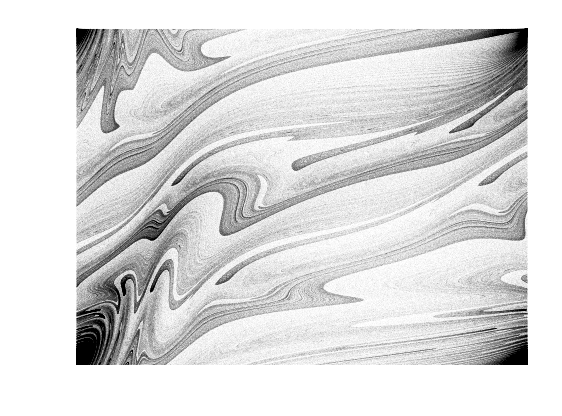

 11.419960 seconds (95.56 M allocations: 5.987 GiB, 31.48% gc time)


(-1.7278759400035655, 1.7278759295985675, -1.7278759563121535, 1.7278759129689445)

In [12]:
@time fun()

### minimal spiking network

In [13]:
function poincareFast(n,c)
srand(2)
    ϕ₁,ϕ₂,ϕ₃ = rand(3)
    Φ₂ = [ϕ₂]
    Φ₃ = [ϕ₃]
    tic()
    for s = 1:n
        # find next spiking neuron
        if ϕ₁ > ϕ₂
            if ϕ₁ > ϕ₃
                # first neuron is spiking
                dt = π/2 - ϕ₁
                # evolve phases till next spike time
                ϕ₁ = -π/2
                ϕ₂ = atan(tan(ϕ₂ + dt) - c)
                ϕ₃ += dt
                push!(Φ₂,ϕ₂)
                push!(Φ₃,ϕ₃)
                continue
            end
        elseif ϕ₂ > ϕ₃
            # second neuron is spiking
            dt = π/2 - ϕ₂
            # evolve phases till next spike time
            ϕ₁ += dt
            ϕ₂ = -π/2
            ϕ₃ = atan(tan(ϕ₃ + dt) - c)
            continue
        end
        # third neuron is spiking
        dt = π/2 - ϕ₃
        # evolve phases till next spike time
        ϕ₁ += dt
        ϕ₂ = atan(tan(ϕ₂ + dt) - c)
        ϕ₃ = -π/2
    end
    toc()
plot(Φ₂, Φ₃,",k",ms=.01,alpha=0.01); axis(.5*[-π,π,-π,π]);axis("off")
subplots_adjust(top=1,bottom=0,left=0,right=1);
end

poincareFast (generic function with 1 method)

elapsed time: 0.856503898 seconds
 

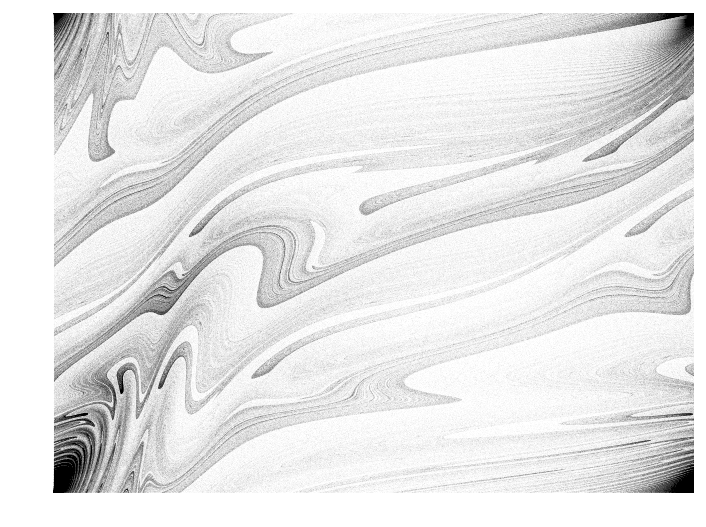

 0.999736 seconds (574 allocations: 66.029 MiB, 0.14% gc time)


In [19]:
gc();@time poincareFast(10^7,1.0)